# Problem Statement


Welcome to Green - A country well known for its greenery and natural resources. Green is working towards the betterment of the environment, natural resources, and health of citizens. Over the past few years, Green has improvised its natural resources by enabling the technologies for a safer future. 


The major investment happened to be in renewable energy. As of today, renewable energy contributes to 60% of the total energy capacity in the country. By 2030, the target is to generate 95% of the total energy through renewable energy.


In order to achieve this objective, the government of Green Energy would like to use Data Science to understand the total energy demand of the country in the near future. This will help the government to build the infrastructure and technologies to achieve 95% of the total energy capacity via renewable energy.


They have captured the estimated total energy demand from the past 12 years on an hourly basis. Now, the government of Green Energy is looking for a data scientist to understand the data and forecast the total energy demand for the next 3 years based on past trends.


# Objective

To build a machine learning/deep learning approach to forecast the total energy demand on an hourly basis for the next 3 years based on past trends.

## About the Dataset

You are provided with total energy demand on an hourly basis for the past 9 years from March 2008 to Dec 2018 in the training set. You need to forecast the total energy demand on an hourly basis for the next 3 years from 2019 to 2021 in the test set.

The first step is to install the Prophet library using Pip, as follows:

In [1]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install plotly
!pip install DateTime

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:

# Import neccessary libraries which involves performance metrics, algorithms, Plotting tools

import matplotlib.pyplot as plt
from prophet import Prophet
import plotly.express as px
import seaborn as sns
import math
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_absolute_error

2022-11-19 17:32:10.968066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 17:32:11.140778: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-19 17:32:11.144207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-19 17:32:11.144217: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [4]:
# Load data

df = pd.read_csv("train_IxoE5JN.csv")
print(df.head())

   row_id             datetime       energy
0       1  2008-03-01 00:00:00  1259.985563
1       2  2008-03-01 01:00:00  1095.541500
2       3  2008-03-01 02:00:00  1056.247500
3       4  2008-03-01 03:00:00  1034.742000
4       5  2008-03-01 04:00:00  1026.334500


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB
None


In [6]:
df.isnull().mean()

row_id      0.000000
datetime    0.000000
energy      0.020002
dtype: float64

### Observation: 
There are some null values in energy column, we need to fill up those empty values with either mean value of the column or we totally drop those rows

In [7]:
df.describe()

,row_id,energy
count,94992.000000,93092.000000
mean,47496.500000,1702.995014
std,27421.972723,369.322103
min,1.000000,866.388600
25%,23748.750000,1431.541100
50%,47496.500000,1654.465800
75%,71244.250000,1935.993450
max,94992.000000,3374.399600


## Observation:
The mean value of energy is 1702.99 and we fill this value in those empty cells

In [8]:
df = df.fillna(df.mean())

In [9]:
# Checking for null values 
df.isnull().mean()

row_id      0.0
datetime    0.0
energy      0.0
dtype: float64

Great! we do not have any null values now, we can proceed further

Now, Let us convert datatime column from object type to datatime type

In [10]:
df_pm = df.copy()
df_pm.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [11]:
df_pm['datetime']= pd.to_datetime(df_pm['datetime'])

In [12]:
print(df_pm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    94992 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB
None


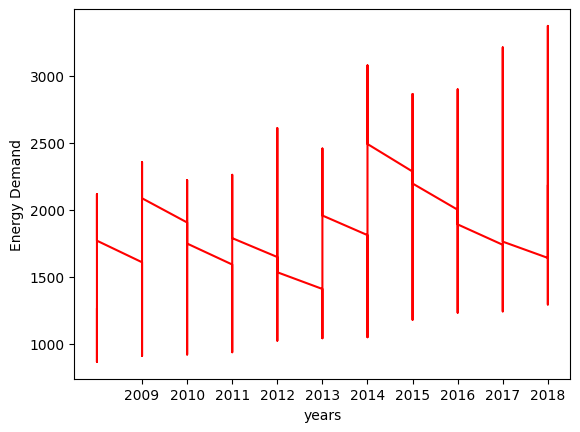

In [13]:
ax = plt.subplot(111)
ax.plot(df_pm['datetime'].dt.year, df_pm['energy'], color='r')
ax.set_xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
plt.xlabel("years")
plt.ylabel('Energy Demand')
plt.show()

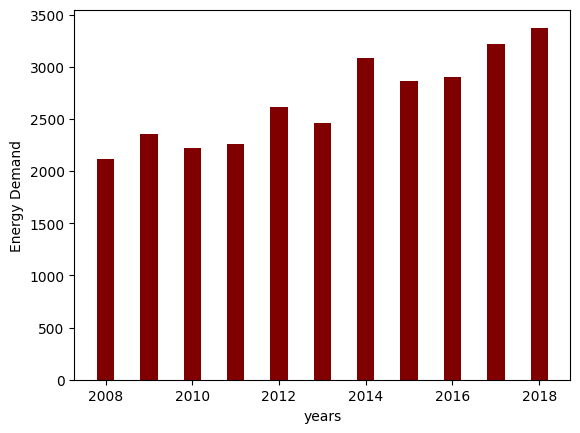

In [14]:
plt.bar(df_pm['datetime'].dt.year, df_pm['energy'],color ='maroon',width = 0.4)
plt.xlabel("years")
plt.ylabel('Energy Demand')
plt.show()

## Observation:
The accompanying graphs shows the progressive rise in energy demand over a ten-year period.

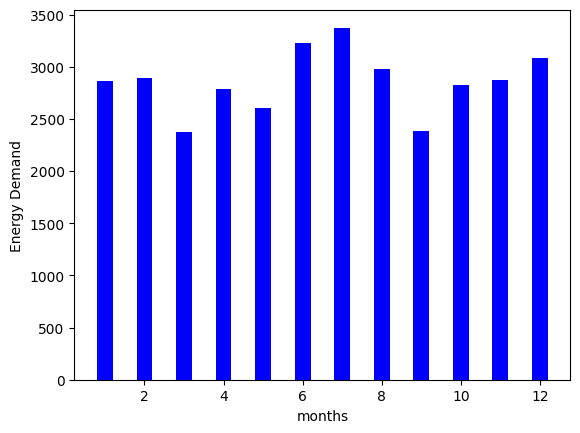

In [15]:
plt.bar(df_pm['datetime'].dt.month, df_pm['energy'],color ='blue',width = 0.4)
plt.xlabel("months")
plt.ylabel('Energy Demand')
plt.show()

## Observation:
We can see that the energy consumption is highest in the months of June and July for any given year, possibly because it is summer.

In [16]:
# prepare dataset for Prophet model

df_pm = df.rename(columns={'datetime':'ds', 'energy':'y'})
df_pm = df_pm.drop(['row_id'], axis=1)
df_pm.head()

,ds,y
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


# Train and Validation split

Here, I am taking 2018 year as test data to validate


In [17]:
df_pm_train = df_pm[:86232]
print(df_pm_train.tail())

df_pm_valid = df_pm[86232:]
print('***************************************')
print(df_pm_valid.head())

                        ds          y
86227  2017-12-31 19:00:00  1942.4160
86228  2017-12-31 20:00:00  1894.7768
86229  2017-12-31 21:00:00  1868.0620
86230  2017-12-31 22:00:00  1857.9288
86231  2017-12-31 23:00:00  1764.2296
***************************************
                        ds            y
86232  2018-01-01 00:00:00  1642.762800
86233  2018-01-01 01:00:00  1702.995014
86234  2018-01-01 02:00:00  1463.655200
86235  2018-01-01 03:00:00  1413.120800
86236  2018-01-01 04:00:00  1385.879600


### Lets define the model and Fit the model

In [18]:
model = Prophet()
model.fit(df_pm_train)

17:34:17 - cmdstanpy - INFO - Chain [1] start processing
17:35:07 - cmdstanpy - INFO - Chain [1] done processing


# Predictions

In [19]:
# Prediction on validation dataset
valid_predict =  model.predict(df_pm_valid)
# summarize the forecast
print(valid_predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                      ds         yhat   yhat_lower   yhat_upper
0    2018-01-01 00:00:00  1860.774382  1658.859348  2094.899710
1    2018-01-01 01:00:00  1777.408689  1549.587008  1998.517924
2    2018-01-01 02:00:00  1713.670094  1506.380784  1931.513160
3    2018-01-01 03:00:00  1676.702082  1455.049042  1885.304003
4    2018-01-01 04:00:00  1671.916492  1461.984926  1884.439342
...                  ...          ...          ...          ...
8755 2018-12-31 19:00:00  2174.994573  1679.174388  2686.816790
8756 2018-12-31 20:00:00  2195.695060  1672.956805  2677.717121
8757 2018-12-31 21:00:00  2189.584453  1718.892638  2700.124304
8758 2018-12-31 22:00:00  2148.271704  1660.605179  2642.650206
8759 2018-12-31 23:00:00  2078.811991  1611.742861  2565.696638

[8760 rows x 4 columns]


                   ds         yhat   yhat_lower   yhat_upper
0 2018-01-01 00:00:00  1860.774382  1658.859348  2094.899710
1 2018-01-01 01:00:00  1777.408689  1549.587008  1998.517924
2 2018-01-01 02:00:00  1713.670094  1506.380784  1931.513160
3 2018-01-01 03:00:00  1676.702082  1455.049042  1885.304003
4 2018-01-01 04:00:00  1671.916492  1461.984926  1884.439342


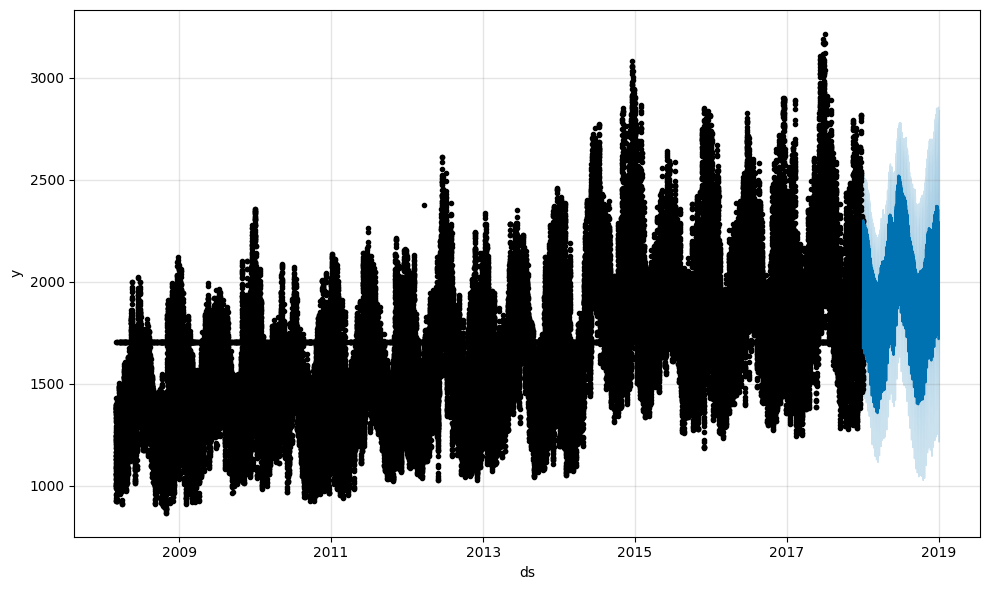

In [20]:
print(valid_predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(valid_predict)
plt.show()

## Observation

In the aforementioned graph, the dark colour markings stand in for the training data, while the dark blue colour represents the predicted value (yhat) and the sky blue colour represents the lower and upper bounds on the predicted value (yhat lower and yhat upper) of validation dataset, which indicate the forecast's level of uncertainty.

# Performance of Model

In [21]:
# calculate RMSE between expected and predicted values

y_true = df_pm_valid['y'].values
y_pred = valid_predict['yhat'].values


MSE = mean_squared_error(y_true, y_pred)

RMSE = math.sqrt(MSE)
print('Root Mean Square Error : %.3f' % RMSE)

Root Mean Square Error : 234.101


### Root Mean Square Error : 234.101

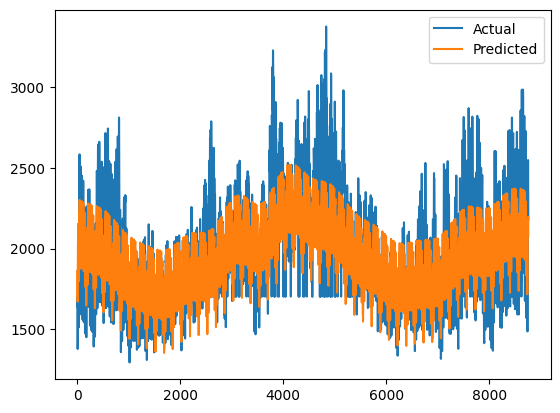

In [22]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# Future Predictions

### Predictions for next 3 years i.e 2019, 2020 (leap year), 2021.

### Here, I created three years' worth of data on hourly basis 

2019, 2020 (leap), 2021 -- > 365 + 366 + 365 = 1096 days

1 day = 24 hours

24 x 1096 = 26304 hours

In [103]:
future =  model.make_future_dataframe(periods = 26305,freq='h')
print(future.head(5))
print("***************************")
print(future.tail(5))

                   ds
0 2008-03-01 00:00:00
1 2008-03-01 01:00:00
2 2008-03-01 02:00:00
3 2008-03-01 03:00:00
4 2008-03-01 04:00:00
***************************
                        ds
121292 2021-12-31 20:00:00
121293 2021-12-31 21:00:00
121294 2021-12-31 22:00:00
121295 2021-12-31 23:00:00
121296 2022-01-01 00:00:00


In [57]:
future.shape

(121297, 1)

In [86]:
future_spec = future[94992:]
future_spec.head()

,ds
94992,2019-01-01 00:00:00
94993,2019-01-01 01:00:00
94994,2019-01-01 02:00:00
94995,2019-01-01 03:00:00
94996,2019-01-01 04:00:00


In [87]:
future_spec.tail()

,ds
121292,2021-12-31 20:00:00
121293,2021-12-31 21:00:00
121294,2021-12-31 22:00:00
121295,2021-12-31 23:00:00
121296,2022-01-01 00:00:00


In [88]:
future_spec.shape

(26305, 1)

### Defining Prophet model and fitting the model for whole training dataset

In [89]:
model = Prophet()
model.fit(df_pm)

19:25:36 - cmdstanpy - INFO - Chain [1] start processing
19:26:51 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
# use the model to make a forecast
forecast = model.predict(future_spec)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                       ds         yhat   yhat_lower   yhat_upper
0     2019-01-01 00:00:00  2019.081104  1816.633217  2261.374391
1     2019-01-01 01:00:00  1944.963842  1727.758777  2172.001748
2     2019-01-01 02:00:00  1890.364186  1677.768705  2107.773799
3     2019-01-01 03:00:00  1862.306035  1642.654116  2095.399506
4     2019-01-01 04:00:00  1866.186240  1635.861674  2095.572965
...                   ...          ...          ...          ...
26300 2021-12-31 20:00:00  2554.671865  -346.866986  5520.494733
26301 2021-12-31 21:00:00  2539.256758  -273.834969  5409.961421
26302 2021-12-31 22:00:00  2487.771604  -449.980785  5329.703137
26303 2021-12-31 23:00:00  2407.673378  -475.641901  5300.740434
26304 2022-01-01 00:00:00  2316.801552  -537.791103  5280.216871

[26305 rows x 4 columns]


## Observation:
forecast date time = ‘ds‘, 

forecasted value = ‘yhat‘,

lower bound = 'yhat_lower',

upper bound = 'yhat_upper' 

on the predicted value which are the uncertainty of the forecast.

                   ds         yhat   yhat_lower   yhat_upper
0 2019-01-01 00:00:00  2019.081104  1816.633217  2261.374391
1 2019-01-01 01:00:00  1944.963842  1727.758777  2172.001748
2 2019-01-01 02:00:00  1890.364186  1677.768705  2107.773799
3 2019-01-01 03:00:00  1862.306035  1642.654116  2095.399506
4 2019-01-01 04:00:00  1866.186240  1635.861674  2095.572965


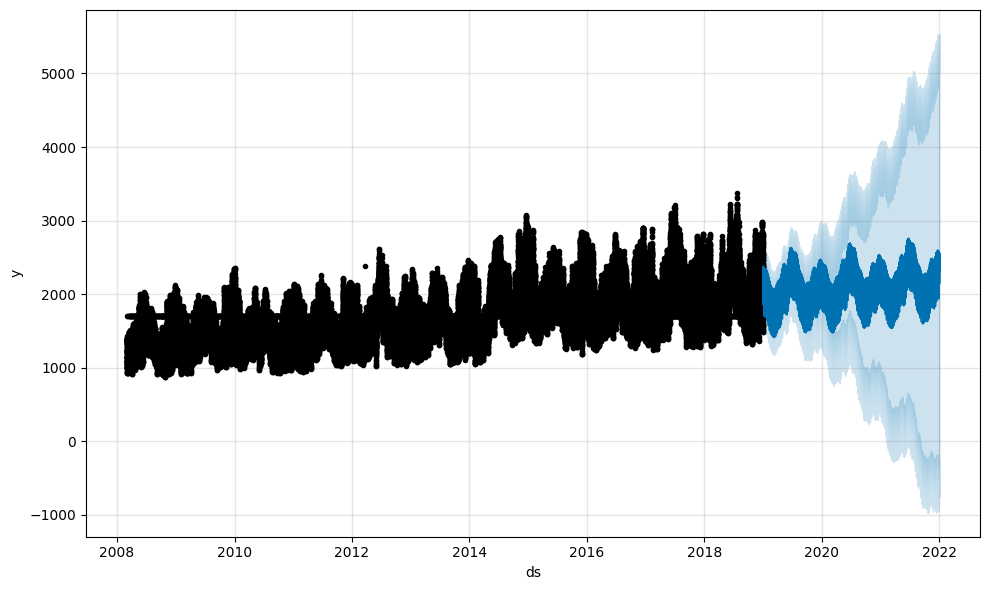

In [91]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
plt.show()

## Observation

In the aforementioned graph, the dark colour markings stand in for the training data, while the dark blue colour represents the predicted value (yhat) and the sky blue colour represents the lower and upper bounds on the predicted value (yhat lower and yhat upper), which indicate the forecast's level of uncertainty.

### Hence, we have the predicted values we can project these values into test dataset

In [92]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,2058.808439,1816.633217,2261.374391,2058.808439,2058.808439,-39.727335,-39.727335,-39.727335,-77.936922,...,-62.154950,-62.154950,-62.154950,100.364537,100.364537,100.364537,0.0,0.0,0.0,2019.081104
1,2019-01-01 01:00:00,2058.815410,1727.758777,2172.001748,2058.815410,2058.815410,-113.851568,-113.851568,-113.851568,-160.194204,...,-53.799521,-53.799521,-53.799521,100.142157,100.142157,100.142157,0.0,0.0,0.0,1944.963842
2,2019-01-01 02:00:00,2058.822381,1677.768705,2107.773799,2058.822381,2058.822381,-168.458195,-168.458195,-168.458195,-222.942489,...,-45.435560,-45.435560,-45.435560,99.919853,99.919853,99.919853,0.0,0.0,0.0,1890.364186
3,2019-01-01 03:00:00,2058.829353,1642.654116,2095.399506,2058.829353,2058.829353,-196.523318,-196.523318,-196.523318,-259.112285,...,-37.108665,-37.108665,-37.108665,99.697632,99.697632,99.697632,0.0,0.0,0.0,1862.306035
4,2019-01-01 04:00:00,2058.836324,1635.861674,2095.572965,2058.836324,2058.836324,-192.650085,-192.650085,-192.650085,-263.262243,...,-28.863345,-28.863345,-28.863345,99.475504,99.475504,99.475504,0.0,0.0,0.0,1866.186240


In [93]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26300,2021-12-31 20:00:00,2242.158183,-346.866986,5520.494733,-641.221391,5186.086097,312.513682,312.513682,312.513682,155.430942,...,57.162887,57.162887,57.162887,99.919853,99.919853,99.919853,0.0,0.0,0.0,2554.671865
26301,2021-12-31 21:00:00,2242.165154,-273.834969,5409.961421,-641.458965,5186.305880,297.091603,297.091603,297.091603,141.041639,...,56.352332,56.352332,56.352332,99.697632,99.697632,99.697632,0.0,0.0,0.0,2539.256758
26302,2021-12-31 22:00:00,2242.172126,-449.980785,5329.703137,-641.696540,5186.525663,245.599478,245.599478,245.599478,90.644719,...,55.479256,55.479256,55.479256,99.475504,99.475504,99.475504,0.0,0.0,0.0,2487.771604
26303,2021-12-31 23:00:00,2242.179097,-475.641901,5300.740434,-641.934114,5186.745445,165.494281,165.494281,165.494281,11.703050,...,54.537754,54.537754,54.537754,99.253477,99.253477,99.253477,0.0,0.0,0.0,2407.673378
26304,2022-01-01 00:00:00,2242.186069,-537.791103,5280.216871,-642.171689,5186.965228,74.615484,74.615484,74.615484,-77.936922,...,53.520847,53.520847,53.520847,99.031559,99.031559,99.031559,0.0,0.0,0.0,2316.801552


## Observation: 
We need only forcasted values from the future dataframe, therefore we can drop other columns

In [94]:
forecast_specific = forecast.loc[:, forecast.columns.isin(['ds','yhat'])]
forecast_specific.head()

,ds,yhat
0,2019-01-01 00:00:00,2019.081104
1,2019-01-01 01:00:00,1944.963842
2,2019-01-01 02:00:00,1890.364186
3,2019-01-01 03:00:00,1862.306035
4,2019-01-01 04:00:00,1866.186240


In [95]:
forecast_specific = forecast_specific.rename(columns={'ds':'datetime', 'yhat':'energy'})
forecast_specific.head()

,datetime,energy
0,2019-01-01 00:00:00,2019.081104
1,2019-01-01 01:00:00,1944.963842
2,2019-01-01 02:00:00,1890.364186
3,2019-01-01 03:00:00,1862.306035
4,2019-01-01 04:00:00,1866.186240


In [96]:
forecast_specific.shape

(26305, 2)

In [97]:
# Load test data

df_test = pd.read_csv("test_WudNWDM.csv")
print(df_test.head())

   row_id             datetime
0   94993  2019-01-01 00:00:00
1   94994  2019-01-01 01:00:00
2   94995  2019-01-01 02:00:00
3   94996  2019-01-01 03:00:00
4   94997  2019-01-01 04:00:00


In [98]:
df_test['datetime']= pd.to_datetime(df_test['datetime'])

In [101]:
df_final = pd.merge(forecast_specific, df_test, on='datetime', how='outer')
df_final = df_final[['row_id','datetime','energy']]
df_final = df_final.drop(['datetime'],axis=1)
df_final = df_final[df_final['row_id'].notna()]
df_final.head()

,row_id,energy
0,94993.0,2019.081104
1,94994.0,1944.963842
2,94995.0,1890.364186
3,94996.0,1862.306035
4,94997.0,1866.186240


## Saving the dataframe

In [102]:
df_final.to_csv('submission_final.csv',index=False)